In [1]:
# Data adapted from Vivek Modi and Ronald L. Dunbrack Jr.: https://doi.org/10.1038/s41598-019-56499-4
# under a CC BY 4.0 license: https://creativecommons.org/licenses/by/4.0/

%matplotlib inline
from matplotlib import pyplot as plt
from Bio import AlignIO as aio

alignment = aio.read("modi-dunbrack_2019_kinase-domains.fasta", "fasta")
print(alignment)

SingleLetterAlphabet() alignment with 498 rows and 2218 columns
B1N---B1N~B1C-------B1C--------B1~B2-------B...--- 0ANNOTATION/1-2208
FEYL----------------KLLGKGT----------------F...RFF AGC_AKT1/150-408
FDYL----------------KLLGKGT----------------F...RFF AGC_AKT2/152-409
FDYL----------------KLLGKGT----------------F...SFF AGC_AKT3/148-405
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPA/77-343
FEII----------------KVIGRGA----------------F...AFF AGC_CDC42BPB/76-342
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPG/71-337
FEVR----------------SLVGCGH----------------F...PFF AGC_CIT/97-360
FEIL----------------KVIGRGA----------------F...PFF AGC_DMPK/71-339
FLDF----------------RVLGKGG----------------F...PLF AGC_GRK1/190-455
FSVH----------------RIIGRGG----------------F...PFF AGC_GRK2/191-453
FSVH----------------RIIGRGG----------------F...SFF AGC_GRK3/191-453
FRHY----------------RVLGKGG----------------F...PVF AGC_GRK4/187-449
FRQY----------------RVLGKGG----------------F

In [2]:
print(alignment[0])
print("\n\n")
print(alignment[1:])
alignment_trim = alignment[1:]

ID: 0ANNOTATION/1-2208
Name: 0ANNOTATION/1-2208
Description: 0ANNOTATION/1-2208 ANNOTATION ANNOTATION P00000
Number of features: 0
Seq('B1N---B1N~B1C-------B1C--------B1~B2-------B2---------...---', SingleLetterAlphabet())



SingleLetterAlphabet() alignment with 497 rows and 2218 columns
FEYL----------------KLLGKGT----------------F...RFF AGC_AKT1/150-408
FDYL----------------KLLGKGT----------------F...RFF AGC_AKT2/152-409
FDYL----------------KLLGKGT----------------F...SFF AGC_AKT3/148-405
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPA/77-343
FEII----------------KVIGRGA----------------F...AFF AGC_CDC42BPB/76-342
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPG/71-337
FEVR----------------SLVGCGH----------------F...PFF AGC_CIT/97-360
FEIL----------------KVIGRGA----------------F...PFF AGC_DMPK/71-339
FLDF----------------RVLGKGG----------------F...PLF AGC_GRK1/190-455
FSVH----------------RIIGRGG----------------F...PFF AGC_GRK2/191-453
FSVH----------------RIIG

In [3]:
import numpy as np

# We would like the alignment to be sorted by kinase groups so we can easily grab a subalignment of each group.
# This is already the case for our example, but let's just make sure by re-sorting:
alignment_trim.sort() # by default sorts on id, but we could also give it an arbitrary function

groupnames = ["AGC", "CAMK", "CK1", "CMGC", "NEK", "RGC", "STE", "TKL", "TYR", "OTHER"]

seqids = [sr.id.split("/")[0] for sr in alignment_trim]
groups = np.array([seqid.split("_")[0] for seqid in seqids])
indices = []
for i, groupname in enumerate(groupnames):
    indices.append(np.where(groups == groupname)[0])
    print(alignment_trim[np.min(indices[i]):np.max(indices[i])])

SingleLetterAlphabet() alignment with 61 rows and 2218 columns
FEYL----------------KLLGKGT----------------F...RFF AGC_AKT1/150-408
FDYL----------------KLLGKGT----------------F...RFF AGC_AKT2/152-409
FDYL----------------KLLGKGT----------------F...SFF AGC_AKT3/148-405
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPA/77-343
FEII----------------KVIGRGA----------------F...AFF AGC_CDC42BPB/76-342
FEIL----------------KVIGRGA----------------F...PFF AGC_CDC42BPG/71-337
FEVR----------------SLVGCGH----------------F...PFF AGC_CIT/97-360
FEIL----------------KVIGRGA----------------F...PFF AGC_DMPK/71-339
FLDF----------------RVLGKGG----------------F...PLF AGC_GRK1/190-455
FSVH----------------RIIGRGG----------------F...PFF AGC_GRK2/191-453
FSVH----------------RIIGRGG----------------F...SFF AGC_GRK3/191-453
FRHY----------------RVLGKGG----------------F...PVF AGC_GRK4/187-449
FRQY----------------RVLGKGG----------------F...PFF AGC_GRK5/186-448
FRQY----------------RVLGKGG----------------F...

In [4]:
# Let's tally up the number of each character in each column for each group:
aa_codes = "ACDEFGHIKLMNPQRSTVWY-"

charcounts = np.zeros((len(groupnames), alignment_trim.get_alignment_length(), len(aa_codes)), dtype = int)

for i, groupname in enumerate(groupnames):
    for j in range(alignment_trim.get_alignment_length()):
        for char in alignment_trim[np.min(indices[i]):np.max(indices[i]), j]:
            charcounts[i, j, aa_codes.index(char.upper())] += 1

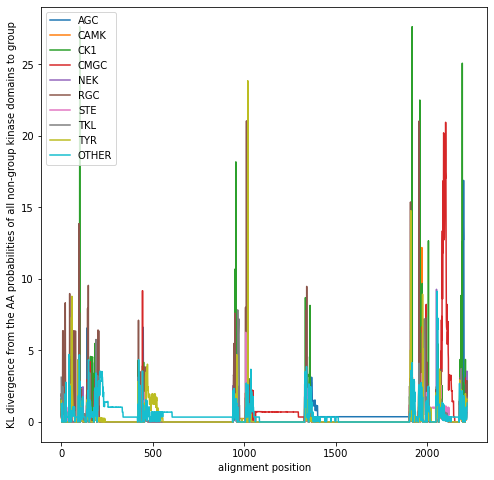

In [5]:
plt.figure(figsize = (8,8))

for i, groupname in enumerate(groupnames):
    probabilities_group = charcounts[i]
    probabilities_group = probabilities_group / np.sum(probabilities_group, axis = 1)[:, np.newaxis] + 1e-12
    probabilities_reference = np.sum(charcounts[np.arange(len(groupnames)) != i], axis = 0)
    probabilities_reference = probabilities_reference / np.sum(probabilities_reference, axis = 1)[:, np.newaxis] + 1e-12
    plt.plot(np.sum(probabilities_group * np.log(probabilities_group / probabilities_reference), axis = 1))

plt.xlabel("alignment position")
plt.ylabel("KL divergence from the AA probabilities of all non-group kinase domains to group")
plt.legend(groupnames)

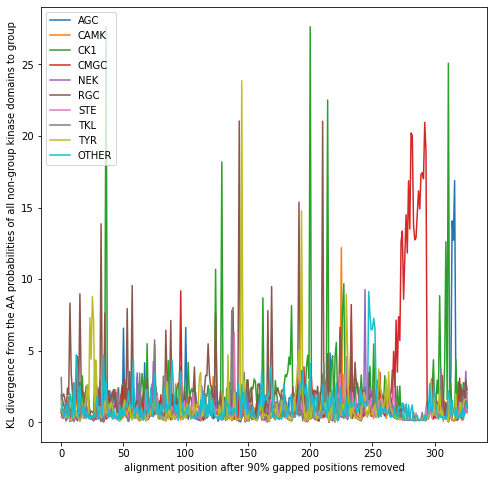

In [6]:
plt.figure(figsize = (8,8))

nongapped_positions = np.where(np.sum(charcounts, axis = 0)[:,-1] / np.sum(np.sum(charcounts, axis = 0), axis = 1) < 0.9)

for i, groupname in enumerate(groupnames):
    probabilities_group = charcounts[i]
    probabilities_group = probabilities_group / np.sum(probabilities_group, axis = 1)[:, np.newaxis] + 1e-12
    probabilities_reference = np.sum(charcounts[np.arange(len(groupnames)) != i], axis = 0)
    probabilities_reference = probabilities_reference / np.sum(probabilities_reference, axis = 1)[:, np.newaxis] + 1e-12
    plt.plot(np.sum(probabilities_group * np.log(probabilities_group / probabilities_reference), axis = 1)[nongapped_positions])

plt.xlabel("alignment position after 90% gapped positions removed")
plt.ylabel("KL divergence from the AA probabilities of all non-group kinase domains to group")
plt.legend(groupnames)

Text(0, 0.5, 'KL divergence from the AA probabilities of all non-TYR group kinase domains to TYR group')

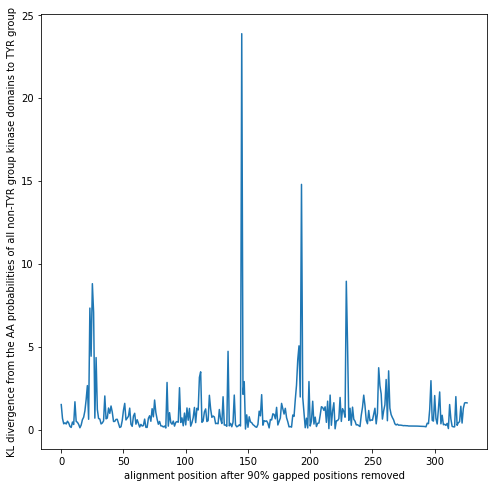

In [7]:
# Let's focus on TYR group kinases
plt.figure(figsize = (8,8))

i = groupnames.index("TYR")
groupname = "TYR"

probabilities_group = charcounts[i]
probabilities_group = probabilities_group / np.sum(probabilities_group, axis = 1)[:, np.newaxis] + 1e-12
probabilities_reference = np.sum(charcounts[np.arange(len(groupnames)) != i], axis = 0)
probabilities_reference = probabilities_reference / np.sum(probabilities_reference, axis = 1)[:, np.newaxis] + 1e-12
plt.plot(np.sum(probabilities_group * np.log(probabilities_group / probabilities_reference), axis = 1)[nongapped_positions])

plt.xlabel("alignment position after 90% gapped positions removed")
plt.ylabel("KL divergence from the AA probabilities of all non-TYR group kinase domains to TYR group")

In [8]:
print(alignment_trim[np.min(indices[groupnames.index("TYR")]):np.max(indices[groupnames.index("TYR")]),1010:1030])
print(alignment_trim[np.min(indices[groupnames.index("TKL")]):np.max(indices[groupnames.index("TKL")]),1010:1030])

SingleLetterAlphabet() alignment with 93 rows and 20 columns
HSDL-----ALRNCLLTA-- TYR_AATK/125-397
HRDL-----AARNCLVGE-- TYR_ABL1/242-495
HRDL-----AARNCLVGE-- TYR_ABL2/288-541
HRDI-----AARNCLLTC-- TYR_ALK/1116-1385
HRDL-----AARNCMLNE-- TYR_AXL/536-805
HRDL-----RAANILVSE-- TYR_BLK/241-492
HRDL-----AARNCLVDR-- TYR_BMX/417-668
HRDL-----AARNCLVND-- TYR_BTK/402-653
HRDV-----AARNVLLTN-- TYR_CSF1R/582-912
HRDL-----AARNVLVSE-- TYR_CSK/195-442
HRDL-----ATRNCLVGE-- TYR_DDR1/610-907
HRDL-----ATRNCLVGK-- TYR_DDR2/563-851
HRDL-----AARNVLVKT-- TYR_EGFR/712-970
HRDL-----AARNILVNQ-- TYR_EPHA1/624-882
HRGL-----AARHVLVSS-- TYR_EPHA10/645-902
HRDL-----AARNILVNS-- TYR_EPHA2/613-873
HRDL-----AARNILINS-- TYR_EPHA3/621-880
HRDL-----AARNILVNS-- TYR_EPHA4/621-880
...
HRDL-----RAANILVGE-- TYR_YES1/277-528
SingleLetterAlphabet() alignment with 41 rows and 20 columns
HRDL-----KSKNILVKK-- TKL_ACVR1/208-497
HRDL-----KSKNILVKK-- TKL_ACVR1B/207-496
HRDI-----KSKNILVKK-- TKL_ACVR1C/195-484
HRDI-----KSKNVLLKN-- TKL_ACVR2

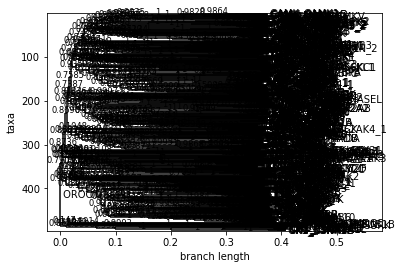

In [9]:
from Bio import Phylo as phy

tree = phy.read("modi-dunbrack_2019_kinase-domains_nj-bootstrap.tre", "newick", comments_are_confidence = True)

phy.draw(tree)

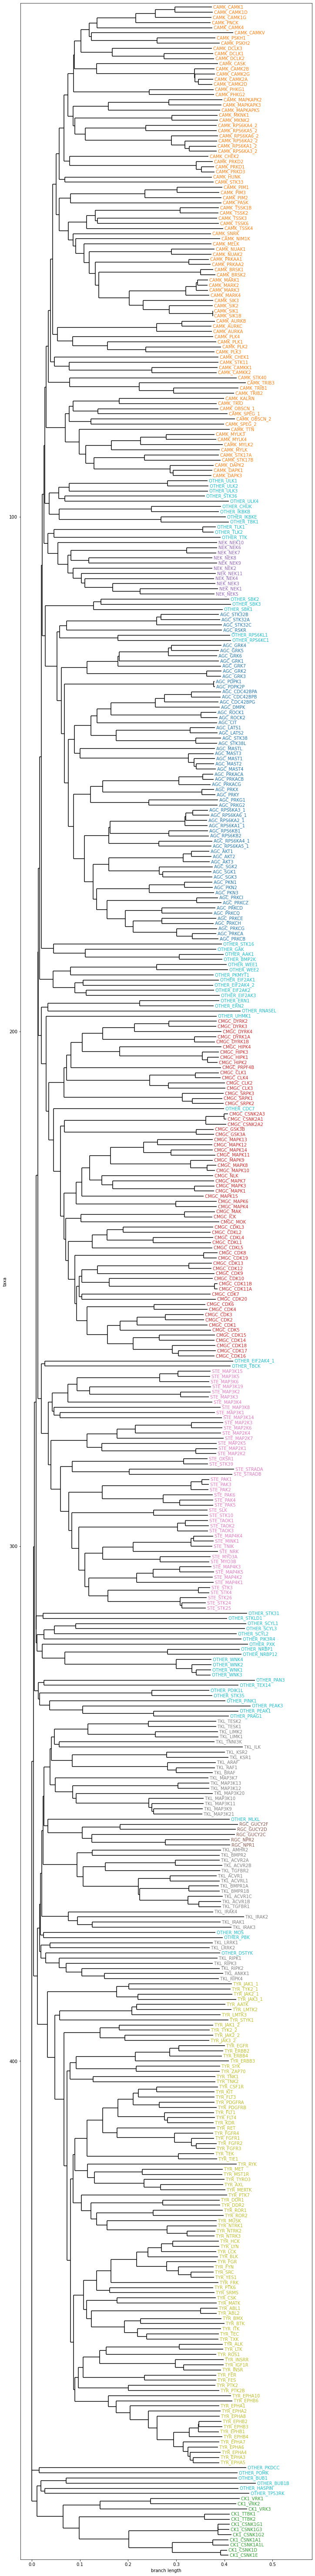

In [10]:
plt.rcParams["figure.figsize"] = [12, 108]

def colortips(label):
    colors = {"AGC": "C0",
              "CAMK": "C1",
              "CK1": "C2",
              "CMGC": "C3",
              "NEK": "C4",
              "RGC": "C5",
              "STE": "C6",
              "TKL": "C7",
              "TYR": "C8",
              "OTHER": "C9"}
    return colors[label.split("_")[0]]

def labeltips(tip):
    if str(tip) == "OROOT":
        return None
    else:
        return str(tip)

phy.draw(tree, show_confidence = False, label_func = labeltips, label_colors = colortips) # use matplotlib to show the tree

Text(0, 0.5, 'number of internal nodes')

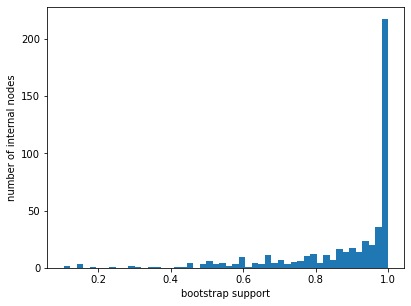

In [11]:
plt.rcParams["figure.figsize"] = [6.4, 4.8] # the default

plt.hist([clade.confidence for clade in tree.get_nonterminals() if clade.name != "OROOT"], bins = 50)
plt.xlabel("bootstrap support")
plt.ylabel("number of internal nodes")

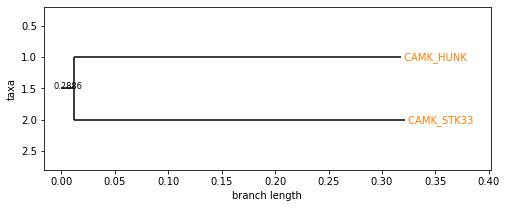

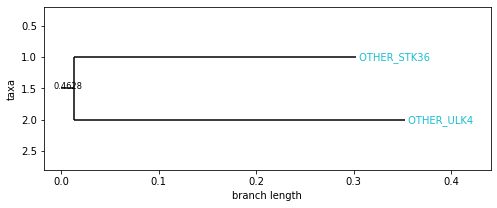

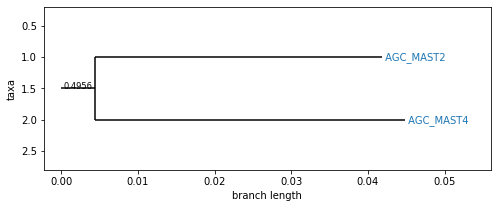

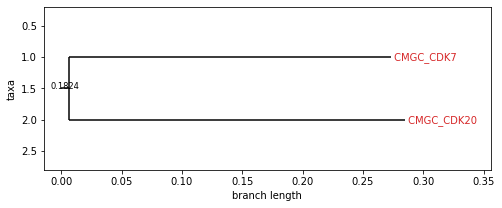

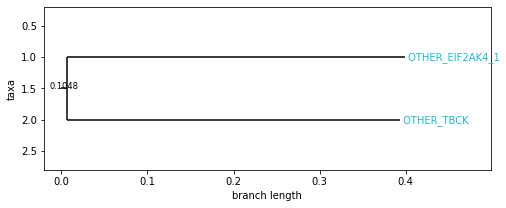

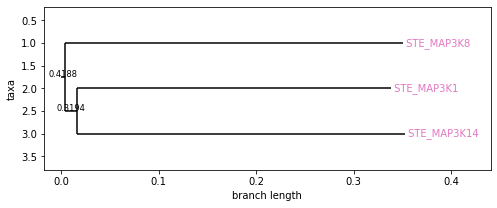

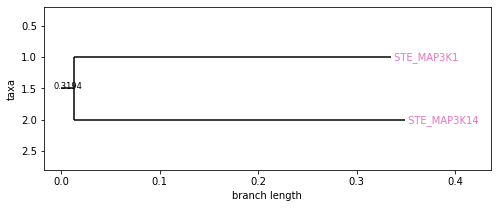

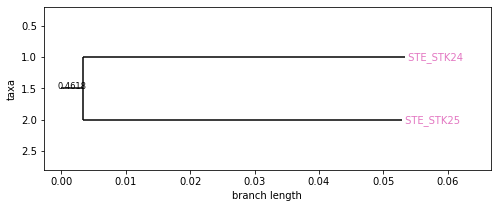

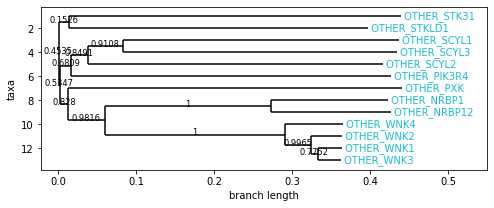

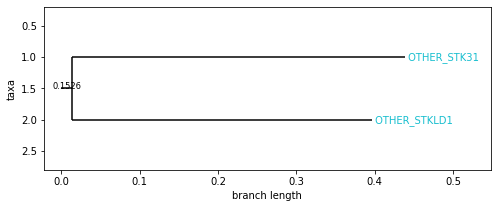

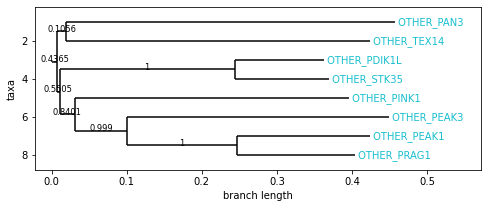

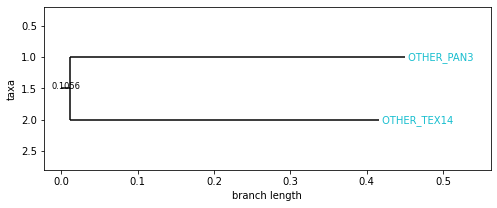

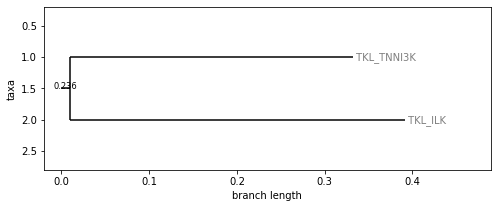

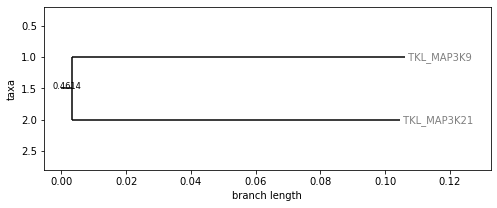

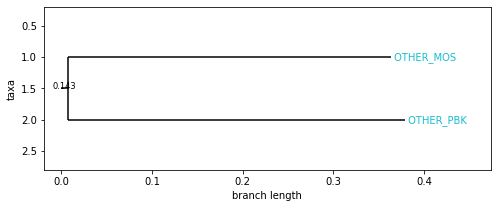

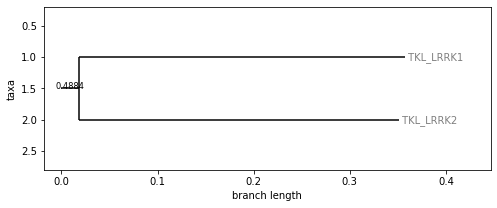

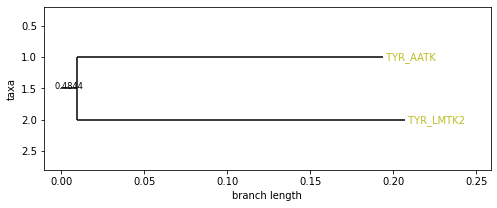

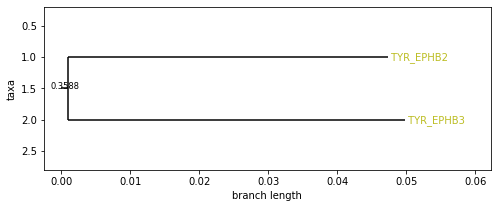

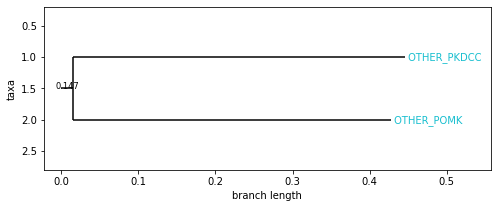

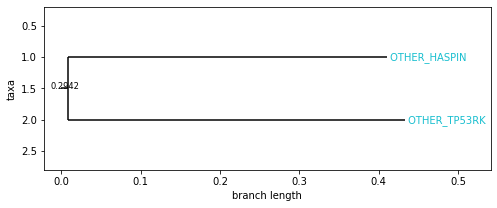

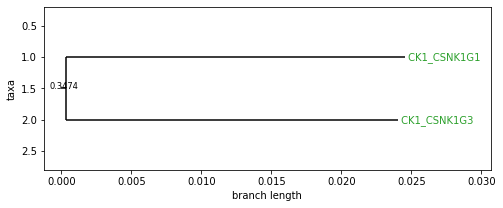

In [12]:
troublesome = [clade for clade in tree.get_nonterminals() if clade.name != "OROOT" and clade.confidence < 0.5]

plt.rcParams["figure.figsize"] = [8, 3]

for clade in troublesome:
    phy.draw(clade, label_func = labeltips, label_colors = colortips)